# QNPY: Analysis of COVID-19 cases time series

#### Import packages:

In [1]:
import QNPy #Importing the package

from QNPy import Preprocess as pr #Importing Preprocess module from the package
from QNPy.Preprocess import * #importing all external packages from Preprocess
from QNPy import SPLITTING_AND_TRAINING as st #Importing SPLITTING_AND_TRAINING module from the package
from QNPy.SPLITTING_AND_TRAINING import * #Importing all packages from SPLITTING_AND_TRAINING module

### 1. Transform the data

In [2]:
# Absolute path to the data:
path_cases = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_qnpy'
# We want to select all .csv files in the directory:
csv_files = glob.glob(path_cases + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
data = pd.concat(df_list, ignore_index=True)

In [3]:
data

,mjd,mag,magerr
0,0.0,0.0,0.05
1,1.0,37.0,0.05
2,2.0,44.0,0.05
3,3.0,60.0,0.05
4,4.0,67.0,0.05
...,...,...,...
700375,233.0,9444.0,0.05
700376,234.0,9444.0,0.05
700377,235.0,9444.0,0.05
700378,236.0,9464.0,0.05


#### Padding:

In [4]:
source_dir = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_qnpy'
target_dir = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded'
padding= pr.backward_pad_curves(source_dir,target_dir , desired_observations=300)

Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10001_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10003_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\10005_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1001_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1003_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded\1005_cases.csv
Created new file: C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulat

#### Transformation:

In [5]:
SOURCE = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_padded'
TARGET = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc'
files = os.listdir(SOURCE)
number_of_points, trcoeff = pr.transform_and_save(files, SOURCE, TARGET, transform)

### 2. Split the data

In [6]:
DATA_SRC = r'C:\Users\marko\OneDrive\Documents\ADA master\Time Series Data Analysis\COVID_project\data\cumulative_cases_preproc' #Path to transformed data

In [7]:
files = os.listdir(DATA_SRC) #listing the transformed data

In [8]:
display(files)

['10001_cases_minus.csv',
 '10001_cases_original.csv',
 '10001_cases_plus.csv',
 '10003_cases_minus.csv',
 '10003_cases_original.csv',
 '10003_cases_plus.csv',
 '10005_cases_minus.csv',
 '10005_cases_original.csv',
 '10005_cases_plus.csv',
 '1001_cases_minus.csv',
 '1001_cases_original.csv',
 '1001_cases_plus.csv',
 '1003_cases_minus.csv',
 '1003_cases_original.csv',
 '1003_cases_plus.csv',
 '1005_cases_minus.csv',
 '1005_cases_original.csv',
 '1005_cases_plus.csv',
 '1007_cases_minus.csv',
 '1007_cases_original.csv',
 '1007_cases_plus.csv',
 '1009_cases_minus.csv',
 '1009_cases_original.csv',
 '1009_cases_plus.csv',
 '1011_cases_minus.csv',
 '1011_cases_original.csv',
 '1011_cases_plus.csv',
 '1013_cases_minus.csv',
 '1013_cases_original.csv',
 '1013_cases_plus.csv',
 '1015_cases_minus.csv',
 '1015_cases_original.csv',
 '1015_cases_plus.csv',
 '1017_cases_minus.csv',
 '1017_cases_original.csv',
 '1017_cases_plus.csv',
 '1019_cases_minus.csv',
 '1019_cases_original.csv',
 '1019_cases_p

In [9]:
#path to TRAIN, TEST and VAL folders where your split data will be saved.
#You can directly enter this information in split_data function
TRAIN_FOLDER = './dataset/train/'
TEST_FOLDER = './dataset/test/'
VAL_FOLDER = './dataset/val/'

In [10]:
st.split_data(files, DATA_SRC, TRAIN_FOLDER, TEST_FOLDER, VAL_FOLDER)

100%|██████████| 9030/9030 [01:19<00:00, 113.10it/s]


In [11]:
# Check the sizes of train, test and val:
def count_files(dir_path):
    count = 0
    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            count += 1
    print('File count:', count)

In [12]:
count_files(TRAIN_FOLDER)
count_files(TEST_FOLDER)
count_files(VAL_FOLDER)

File count: 7186
File count: 961
File count: 883


# 3. Train the model

In [13]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder

MODEL_PATH = "./output/cnp_model.pth" #path for saving model

BATCH_SIZE=32 #Defining the batch size, it should remain 32

In [14]:
#running the function for getting the data loaders of data that are going to be trained
trainLoader, valLoader = st.get_data_loaders(DATA_PATH_TRAIN, DATA_PATH_VAL, BATCH_SIZE)

In [15]:
#defining the device for testing, it can be CPU of CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
#runing the function fo creating the model (deterministic model is default)
#and optimiser (LogProbLoss), mseMetric (MSELoss)
model, optimizer, criterion, mseMetric, maeMetric = st.create_model_and_optimizer(device)

In [17]:
#function for training the data
# numbers that we give in this example are:
#1 - number of training runs
#3000 - number of epochs
#2000 - number of early stopping limit
# These numbers are optional and can be changed as needed.
history_loss_train, history_loss_val, \
    history_mse_train, history_mse_val, \
    history_mae_train, history_mae_val, \
    epoch_counter_train_loss, epoch_counter_train_mse, \
    epoch_counter_train_mae, epoch_counter_val_loss, \
    epoch_counter_val_mse, epoch_counter_val_mae = st.train_model(
    model, trainLoader, valLoader, criterion, optimizer, 1, 100, 50, mseMetric, maeMetric, device)

100%|██████████| 100/100 [27:22<00:00, 16.43s/it]


In [18]:
# Define the file names for saving the lists for all histories
file_names = ["history_loss_train.csv", "history_loss_val.csv", "history_mse_train.csv", "history_mse_val.csv",
              "history_mae_train.csv", "history_mae_val.csv", "epoch_counter_train_loss.csv",
              "epoch_counter_train_mse.csv", "epoch_counter_train_mae.csv", "epoch_counter_val_loss.csv",
              "epoch_counter_val_mse.csv", "epoch_counter_val_mae.csv"]

# Define the lists
lists = [history_loss_train, history_loss_val, history_mse_train, history_mse_val, history_mae_train,
         history_mae_val, epoch_counter_train_loss, epoch_counter_train_mse, epoch_counter_train_mae,
         epoch_counter_val_loss, epoch_counter_val_mse, epoch_counter_val_mae]

In [19]:
#running the function for saving all lists with histories
save_list= st.save_lists_to_csv(file_names, lists)

In [20]:
# Replace with the path to your history_loss_train CSV file
history_loss_train_file = './history_loss_train.csv'
# Replace with the path to your history_loss_val CSV file
history_loss_val_file = './history_loss_val.csv'
# Replace with the path to your epoch_counter_train_loss CSV file
epoch_counter_train_loss_file = './epoch_counter_train_loss.csv'

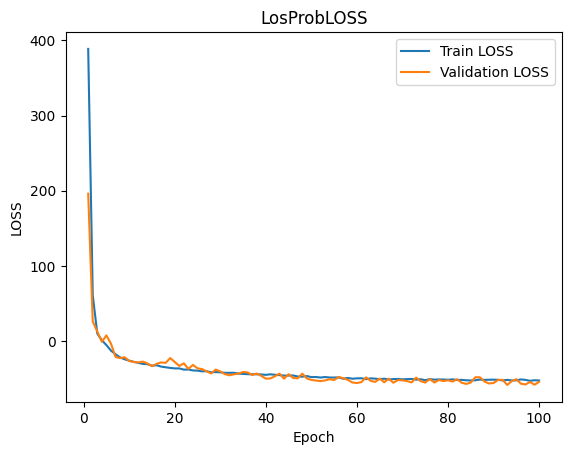

In [21]:
#plotting the Logprobloss after training
logprobloss=st.plot_loss(history_loss_train_file, history_loss_val_file, epoch_counter_train_loss_file)

In [22]:
 # Replace with the path to your history_mse_train CSV file
history_mse_train_file = './history_mse_train.csv'
# Replace with the path to your history_mse_val CSV file
history_mse_val_file = './history_mse_val.csv'
# Replace with the path to your epoch_counter_train_mse CSV file
epoch_counter_train_mse_file = './epoch_counter_train_mse.csv'

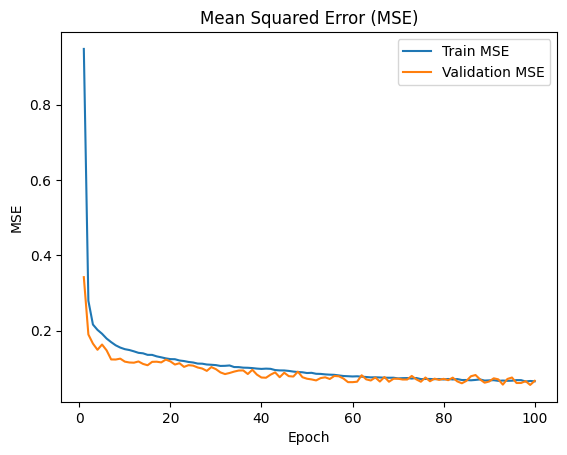

In [23]:
#plotting the MSE metric after training
msemetric=st.plot_mse(history_mse_train_file, history_mse_val_file, epoch_counter_train_mse_file)

In [24]:
# Replace with the path to your history_mae_train CSV file
history_mae_train_file = './history_mae_train.csv'
# Replace with the path to your history_mae_val CSV file
history_mae_val_file = './history_mae_val.csv'
# Replace with the path to your epoch_counter_train_mae CSV file
epoch_counter_train_mae_file = './epoch_counter_train_mae.csv'

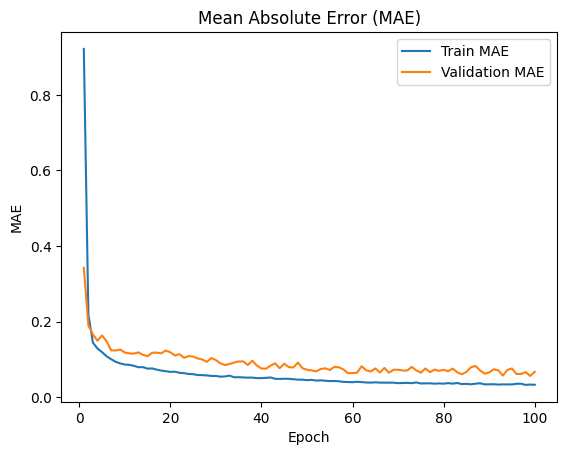

In [25]:
#plotting the MAE metric after training
maemetric=st.plot_mae(history_mae_train_file, history_mae_val_file, epoch_counter_train_mae_file)

In [26]:
save=st.save_model(model, MODEL_PATH)#saving the trained model